In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in dialogue data
df = pd.read_csv('All-seasons.csv')
df.Line = df.Line.str.replace('\n', '')
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [2]:
#Let's look at the number of Seasons included in this data set
print('The seasons in the data set are {}'.format(df.Season.unique()))

The seasons in the data set are ['10' 'Season' '11' '12' '13' '14' '15' '16' '17' '18' '1' '2' '3' '4' '5'
 '6' '7' '8' '9']


We have all dialogues from seasons 1 to 18 this will be fun exploring different speaking patterns of characters.

Let's see who has the most lines through out all of southpark

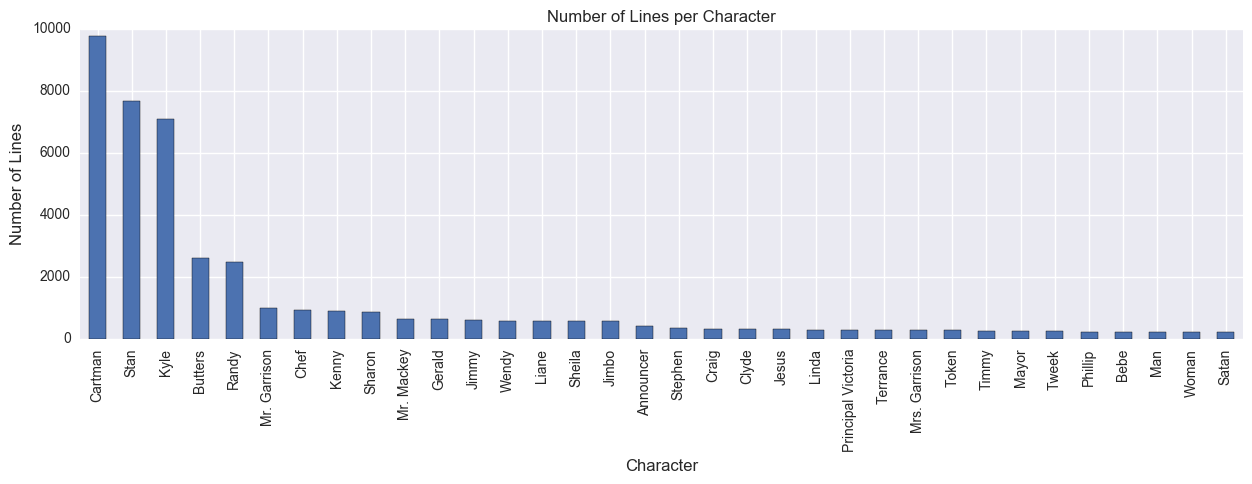

In [3]:
plt.figure(figsize=(15,4))
lines = pd.value_counts(df.Character.values, sort=True)
lines[lines>200].sort_values(ascending=False).plot(kind='bar')#only get characters with more than 50 lines
plt.ylabel('Number of Lines',fontsize=12)
plt.xlabel('Character',fontsize=12)
plt.title('Number of Lines per Character',fontsize=12)
plt.show()

We can see that Cartman, Stan and Kyle are the man characters with Butters and Randy following are 4th and 5th.

Let's see on average how many sentences are in each line for a Character

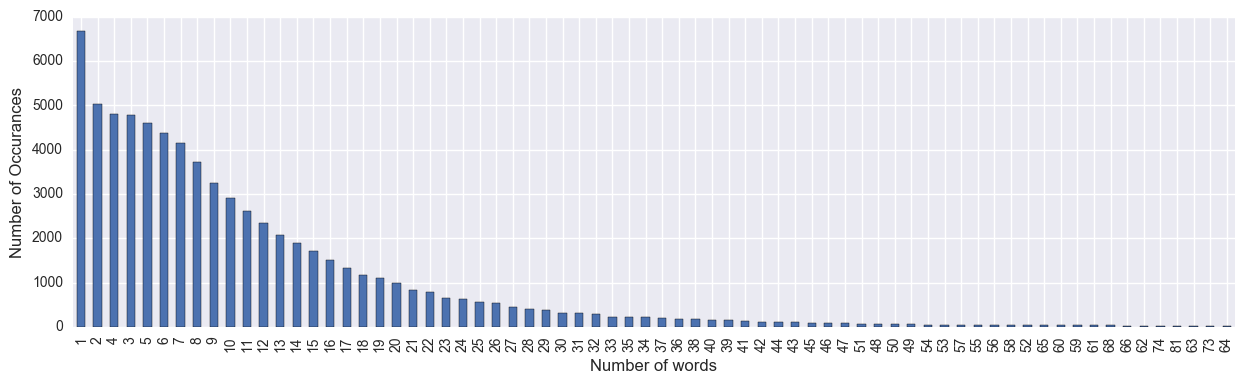

In [84]:
#create column that has number of sentences for a line
import nltk
df['num_words'] = df.Line.apply(lambda x : len(x.split()))
wordCount = pd.value_counts(df.num_words,sort=True)
plt.figure(figsize=(15,4))
wordCount[wordCount>20].plot(kind ='bar')
plt.ylabel('Number of Occurances',fontsize=12)
plt.xlabel('Number of words',fontsize=12)
plt.show()

The majority of lines are only 1 or 2 words let's see what the majority of these one liners are

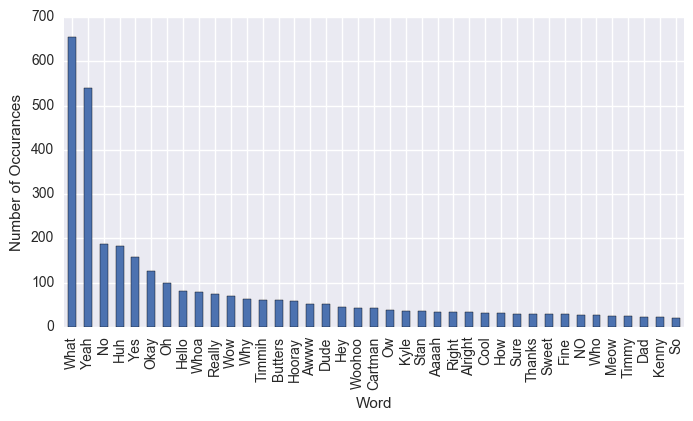

In [59]:
import re
oneWord = pd.value_counts(df[df.num_words==1].Line.apply(lambda x:re.sub(r'\W+', '', x)),sort=True)
plt.figure(figsize=(8,4))
oneWord[oneWord>20].plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Word')
plt.show()

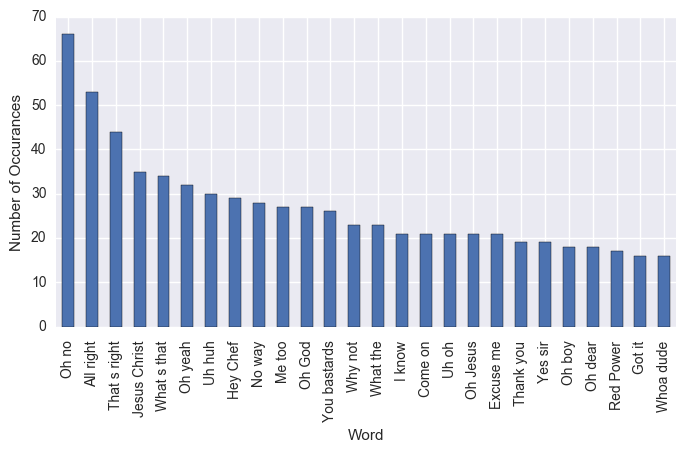

In [68]:
import re
twoWords = pd.value_counts(df[df.num_words==2].Line.apply(lambda x:re.sub(r'\W+', ' ', x)),sort=True)
plt.figure(figsize=(8,4))
twoWords[twoWords>15].plot(kind='bar')
plt.ylabel('Number of Occurances')
plt.xlabel('Word')
plt.show()

We can see some classic quotes such as Jesus christ, You bastards(everytime kennys dies), and Red Power(When cartman gets turned into a ginger)

Let's Explore how many Episodes each character stars in (Most lines in an episode)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


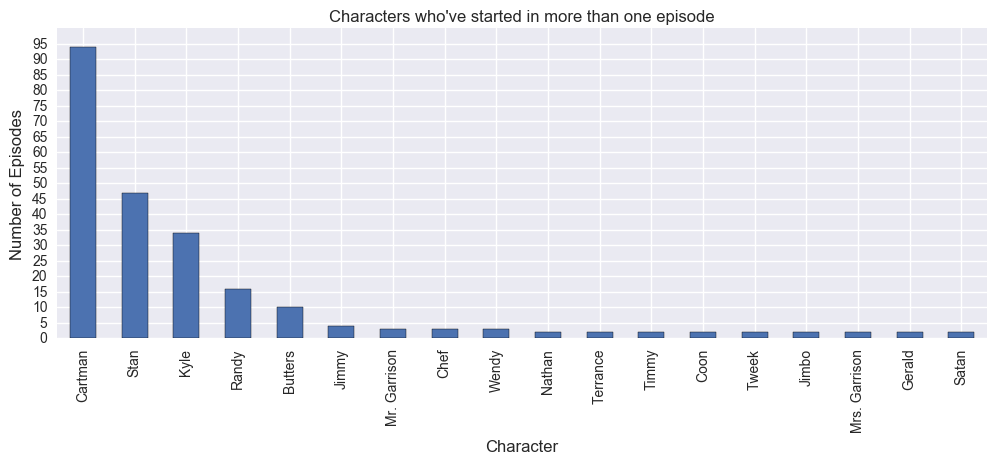

In [52]:
linePerEpisode = df.groupby(['Season','Episode','Character'],as_index=False).count()
starCharacter = linePerEpisode.sort('Line', ascending=False).groupby(['Season','Episode'], as_index=False).first()

plt.figure(figsize=(12,4))
numStar = pd.value_counts(pd.Series(starCharacter.Character),sort=True)
numStar[numStar>1].plot(kind='bar')
plt.title("Characters who've stared in more than one episode")
plt.ylabel('Number of Episodes',fontsize=12)
plt.xlabel('Character',fontsize=12)
plt.yticks(np.arange(0, 100, 5))
plt.show()


These results follows the same trend of characters who have the most lines. 

Let's look at who has the potty mouth based on swear words per number of lines they have

**Swearing**

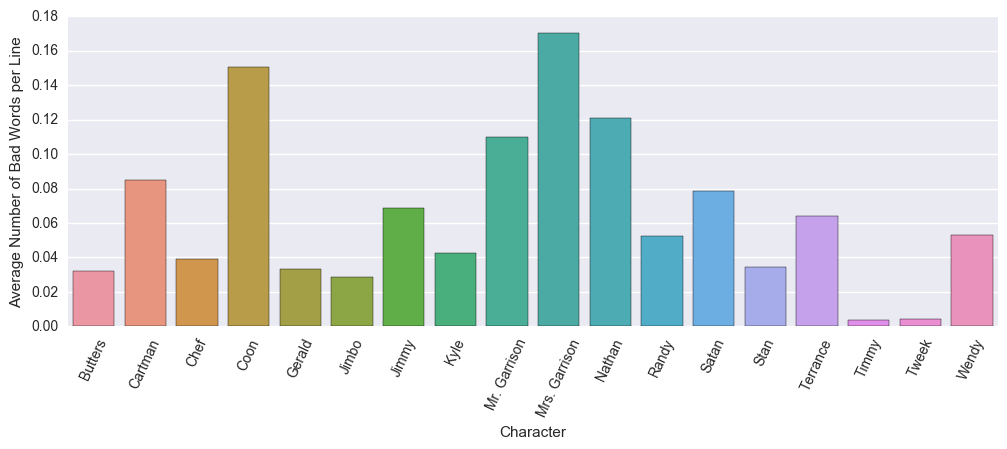

In [92]:
bad = open("badwords.txt", "r")#corpus of swear words found on http://www.phorum.org/phorum5/read.php?63,127769
bad_words = bad.read().split('\n')
#get number of bad words per line
df['num_badwords'] = df.Line.apply(lambda x : sum([1 if word in bad_words else 0 for word in re.sub(r'\W+', ' ', x).split(' ')]))
#get characters who've stared in more than 1 episode
numStar = pd.DataFrame(numStar)
stars = numStar[numStar.Character>1].index
pottyMouth = df.groupby('Character',as_index=False).mean()
pottyMouth = pottyMouth[pottyMouth.Character.isin(stars)]

plt.figure(figsize=(12,4))
sns.barplot(y='num_badwords',x='Character',data=pottyMouth)
plt.xticks(rotation=65)
plt.ylabel('Average Number of Bad Words per Line')
plt.show()

We can see that Mrs. Garrison has the dirtiest mouth of everyone with the coon (Eric Cartmens Superhero persona) and nathan comming in 2nd and 3rd respectively. Timmy and Tweek are the two most respectful characters out of the main one.

Instead of normalizing by number of lines, lets calculate average number of swear words per every word said.

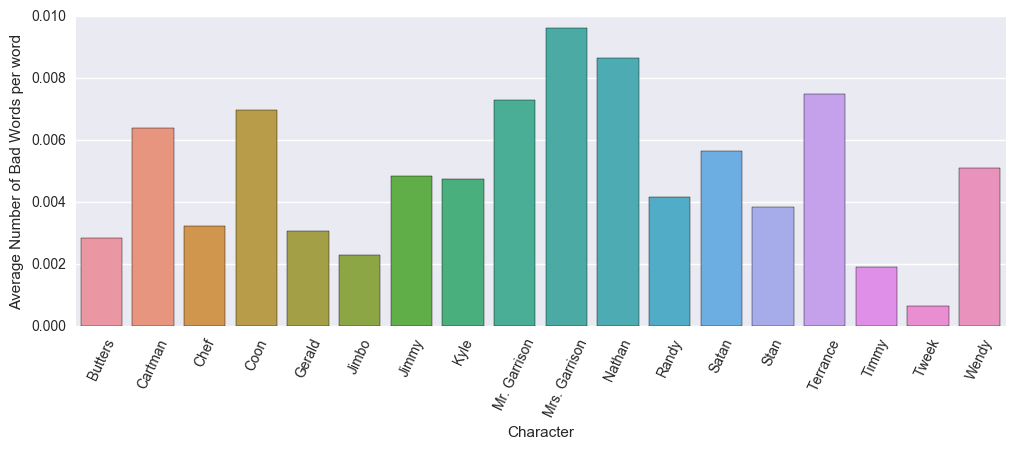

In [99]:
pottyMouth = df.groupby('Character',as_index=False).sum()
stars = numStar[numStar.Character>1].index
pottyMouth = pottyMouth[pottyMouth.Character.isin(stars)]
pottyMouth['badwords_per_words'] = pottyMouth.num_badwords/pottyMouth.num_words

plt.figure(figsize=(12,4))
sns.barplot(y='badwords_per_words',x='Character',data=pottyMouth)
plt.xticks(rotation=65)
plt.ylabel('Average Number of Bad Words per word')
plt.show()

This is similar to the above graph, but we see that terrance and Satan swear more in comparison to the above. 